This project aims to identify fraudulent credit card transactions using machine learning. The data is obtained from Kaggle (<a href='https://www.kaggle.com/mlg-ulb/creditcardfraud' target='_blank'>link</a>). This project will compare the performance of four different classifiers in how well they detect fraud and look at how to handle imbalanced data.

References:
 - <a href="https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets" target="_blank">Credit Fraud || Dealing with Imbalanced Datasets</a> by Janio Martinez
 - <a href="https://medium.com/analytics-vidhya/credit-card-fraud-detection-in-python-using-scikit-learn-f9046a030f50" target="_blank">Credit Card Fraud Detection in Python using Scikit Learn</a>
 
To begin, the important python modules are imported into the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The downloaded data is read into the notebook and the first five rows are shown.

In [2]:
cc_data = pd.read_csv(r"C:\Users\user\Downloads\310_23498_bundle_archive\creditcard.csv")

cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Above and below it is seen that there are 31 columns. The **Time**  column shows how much time eleapsed between transactions, **V1** to **V28** show the principal components of transactions, **Amount** shows how much money was spent per transaction and **Class** is a variable that indicates whether a transaction is valid or fraudulent with fradulent transactions having a value of 1 and valid transactions having a value of 0. As shown below the mean amount spent per transaction is low at around 88 US$. As columns **V1** to **V28** have already been scaled, for uniformity purposes, **Amount** and **Time** should be scaled to. This scaling is done below.

In [3]:
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
cc_data.shape

(284807, 31)

In [55]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

cc_data['Amount_Scaled'] = rob_scaler.fit_transform(cc_data['Amount'].values.reshape(-1,1))
cc_data['Time_Scaled_'] = rob_scaler.fit_transform(cc_data['Time'].values.reshape(-1,1))

cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Scaled,Time_Scaled_
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960


Below the proportions of fraud versus valid cases is shown. The fraud cases make up 0.17% of the data which shows that the data is imbalanced. This means that by using this data as is the model is prone to overfitting as there are nearly 100 non-fraud transactions for every fraudulent transaction. It can be seen from the correlation matrix below that it is not clear which elements have an influence on the class of the transaction.

In [54]:
fraud = cc_data[cc_data['Class'] == 1] 
valid = cc_data[cc_data['Class'] == 0] 
 
print('Number of Fraud Cases: {}'.format(len(cc_data[cc_data['Class'] == 1]))) 
print('Number of Valid Transactions: {}'.format(len(cc_data[cc_data['Class'] == 0])))

Number of Fraud Cases: 492
Number of Valid Transactions: 284315


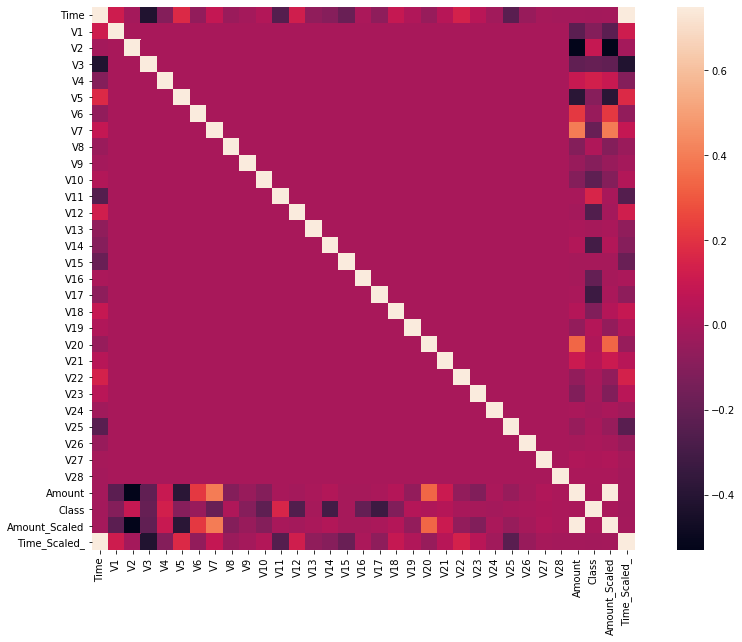

In [56]:
corrmat = cc_data.corr()
fig = plt.figure(figsize = (15, 10))

sns.heatmap(corrmat, vmax = .75, square = True)
plt.show()

To deal with the imbalanced data and skew this creates, a sub-sample of the data is created. This subsample will be a dataframe that contains equal ratio of fraud to non-fraud cases. To create this sub=sample, we need to randomly select 492 non-fraud cases to match the 492 fraud cases we do have. To confirm that the number of cases are equal we check the value counts of the new dataframe.

In [58]:
data = cc_data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0][:492]

data1 = pd.concat([fraud_data, non_fraud_data])

# Shuffle dataframe rows
new_data = data1.sample(frac=1, random_state=42)

new_data.drop(['Time','Amount'], axis=1, inplace=True)

new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled,Time_Scaled_
236005,1.997564,0.166626,-1.272703,1.349015,0.211004,-1.056712,0.444796,-0.332714,0.297526,0.249228,...,-0.180278,0.168191,-0.055141,0.128535,-0.731556,-0.002194,-0.049942,0,-0.099211,0.751207
150668,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,-14.924655,...,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,1,2.326836,0.107708
43215,0.981343,-1.573102,1.349758,-0.240463,-1.865446,0.690289,-1.408883,0.317616,0.379712,0.343298,...,0.743022,-0.288853,0.087104,0.448514,-0.067426,0.053756,0.042446,0,1.998183,-0.508394
268375,-5.238808,0.623013,-5.784507,1.678889,-0.364432,-0.477295,-4.276132,-0.695173,-2.971644,-5.529131,...,1.509239,-0.215966,-0.245727,0.893041,0.865758,0.854657,-0.964482,1,0.251240,0.922109
119714,-0.734303,0.435519,-0.530866,-0.471120,0.643214,0.713832,-1.234572,-2.551412,-2.057724,0.166831,...,1.150354,-0.152555,-1.386745,0.004716,0.219146,-0.058257,0.158048,1,0.111088,-0.107332


In [59]:
print(new_data['Class'].value_counts())

1    492
0    492
Name: Class, dtype: int64


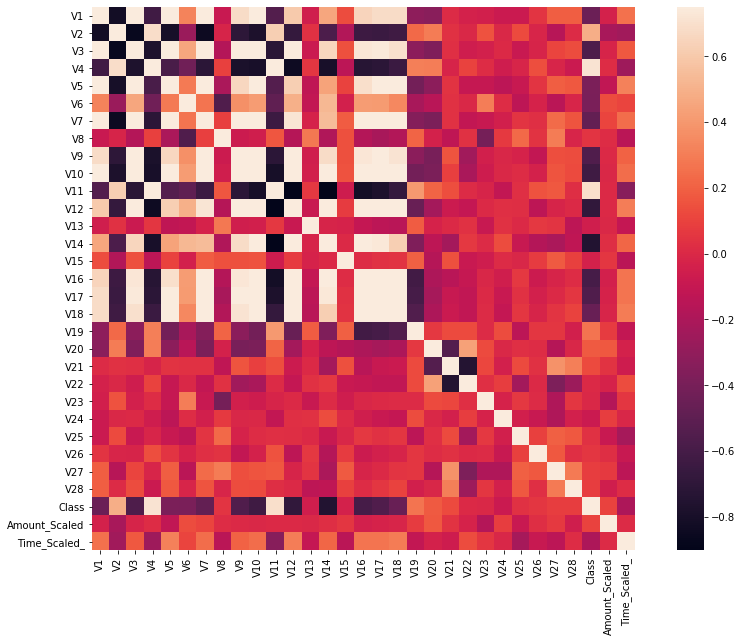

In [60]:
new_corrmat = new_data.corr()
fig = plt.figure(figsize = (15, 10))

sns.heatmap(new_corrmat, vmax = .75, square = True)
plt.show()

The next step is to split the data into train and test sets. This is done by setting the **Class** column as the target column and specifying the size of the test data which is this case is 20% of the data in the dataframe.

In [61]:
X=new_data.drop(['Class'], axis=1)
Y=new_data["Class"]

X_data=X.values
Y_data=Y.values

In [62]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In the cell below, we import the models we intend to use. For this project we shall compare the performance of the Logistic Regression, Gaussian Naive Bayes, Random Forest and KNearest Neighbours classifiers. We also import the metrics to assess the model performance. 

In [64]:
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [65]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=500)

lr_model.fit(X_train, Y_train)
lr_y_pred = lr_model.predict(X_test)

lr_acc=accuracy_score(Y_test,lr_y_pred)
print(f'Accuracy is {(lr_acc)}')
lr_roc_auc=roc_auc_score(Y_test,lr_y_pred)
print(f'The ROC-AUC is {(lr_roc_auc)}')
lr_prec= precision_score(Y_test,lr_y_pred)
print(f"The precision is {(lr_prec)}")
lr_rec= recall_score(Y_test,lr_y_pred)
print(f"The recall is {(lr_rec)}")
lr_f1= f1_score(Y_test,lr_y_pred)
print(f"The F1-Score is {(lr_f1)}")
lr_MCC=matthews_corrcoef(Y_test,lr_y_pred)
print(f"The Matthews correlation coefficient is {(lr_MCC)}")

Accuracy is 0.949238578680203
The ROC-AUC is 0.9497387669801463
The precision is 0.9629629629629629
The recall is 0.9454545454545454
The F1-Score is 0.9541284403669724
The Matthews correlation coefficient is 0.8975102318900298


In [66]:
#Gaussian Naive Bayes
gau_model = GaussianNB()

gau_model.fit(X_train, Y_train)
gau_y_pred = gau_model.predict(X_test)

gau_acc=accuracy_score(Y_test,gau_y_pred)
print(f'Accuracy is {(gau_acc)}')
gau_roc_auc=roc_auc_score(Y_test,gau_y_pred)
print(f'The ROC_AUC score is {(gau_acc)}')
gau_prec= precision_score(Y_test,gau_y_pred)
print(f"The precision is {(gau_prec)}")
gau_rec= recall_score(Y_test,gau_y_pred)
print(f"The recall is {(gau_rec)}")
gau_f1= f1_score(Y_test,gau_y_pred)
print(f"The F1-Score is {(gau_f1)}")
gau_MCC=matthews_corrcoef(Y_test,gau_y_pred)
print(f"The Matthews correlation coefficient is {(gau_MCC)}")

Accuracy is 0.9289340101522843
The ROC_AUC score is 0.9289340101522843
The precision is 0.9705882352941176
The recall is 0.9
The F1-Score is 0.9339622641509434
The Matthews correlation coefficient is 0.8601413058812242


In [67]:
#Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

rfc_y_pred = rfc.predict(X_test)

rfc_acc=accuracy_score(Y_test,rfc_y_pred)
print(f'Accuracy is {(rfc_acc)}')
rfc_roc_auc=roc_auc_score(Y_test,rfc_y_pred)
print(f'The ROC-AUC score is {(rfc_roc_auc)}')
rfc_prec= precision_score(Y_test,rfc_y_pred)
print(f"The precision is {(rfc_prec)}")
rfc_rec= recall_score(Y_test,rfc_y_pred)
print(f"The recall is {(rfc_rec)}")
rfc_f1= f1_score(Y_test,rfc_y_pred)
print(f"The F1-Score is {(rfc_f1)}")
rfc_MCC=matthews_corrcoef(Y_test,rfc_y_pred)
print(f"The Matthews correlation coefficient is {(rfc_MCC)}")

Accuracy is 0.934010152284264
The ROC-AUC score is 0.9349007314524556
The precision is 0.9532710280373832
The recall is 0.9272727272727272
The F1-Score is 0.9400921658986175
The Matthews correlation coefficient is 0.8670875671696815


In [68]:
#KNearest Neighbours
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

knn_y_pred = knn.predict(X_test)

knn_acc=accuracy_score(Y_test,knn_y_pred)
print(f'The accuracy is {(knn_acc)}')
knn_roc_auc=roc_auc_score(Y_test,knn_y_pred)
print(f'The ROC-AUC score is {(knn_roc_auc)}')
knn_prec= precision_score(Y_test,knn_y_pred)
print(f"The precision is {(knn_prec)}")
knn_rec= recall_score(Y_test,knn_y_pred)
print(f"The recall is {(knn_rec)}")
knn_f1= f1_score(Y_test,knn_y_pred)
print(f"The F1-Score is {(knn_f1)}")
knn_MCC=matthews_corrcoef(Y_test,knn_y_pred)
print(f"The Matthews correlation coefficient is {(knn_MCC)}")

The accuracy is 0.9390862944162437
The ROC-AUC score is 0.9406478578892372
The precision is 0.9622641509433962
The recall is 0.9272727272727272
The F1-Score is 0.9444444444444444
The Matthews correlation coefficient is 0.8778170237763464


Below is a side-by-side comparison of the performance of each model. From below, the Logistic Regression model performs the best across the board  followed by the KNearestNeighbours model. Recall is the ability of a classification model to correctly identify the relevant instances. Precision is the ability of a classification model to return only relevant instances.(<a href='https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c' target="_blank">Will Koehrsen</a>) The F1 score is a function of precision and recall and aims to measure of the models accuracy and the closer the value is to 1, the more accurate the model is. (<a href='https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9' target="_blank">Koo Ping Shung</a>) The F1 score is a better measure of a models accuracy than just using accuracy especially when the model is imbalanced. The MCC takes into account the true-positives, true-negatives, false-negatives and false-positives, and a high value (close to 1) means that both classes are predicted well, even if one class is disproportionately under- (or over-) represented. (<a href='https://towardsdatascience.com/the-best-classification-metric-youve-never-heard-of-the-matthews-correlation-coefficient-3bf50a2f3e9a' target="_blank">Boaz Shmueli</a>)

| Model | Accuracy | ROC-AUC | Precision | Recall | F1-Score | MCC |
| --- | --- | --- | --- | --- | --- | --- |
| LogisticRegression | 0.9492 | 0.9497 | 0.9630 | 0.9455 | 0.9541 | 0.8975 |
| GaussianNB | 0.9289 | 0.9289 | 0.9706 | 0.9000 | 0.9340 | 0.8601 |
| RandomForest | 0.9340 | 0.9349 | 0.9533 | 0.9273 | 0.9401 | 0.8671 |
| KNearestNeighbours | 0.9391 | 0.9406 | 0.9623 | 0.9273 | 0.9444 | 0.8778 |

Below, the confusion matrix of each model is shown. This provides a clearer overview of the performance of each model. The confusion matirx is made up as:
- True Positives (Top-Left Square): Observation is positive and correctly predicted as positive.
- False Negatives (Top-Right Square): Observation is positive but incorrectly predicted as negative.
- False Positives (Bottom-Left Square): Observation is negative but incorrectly predicted as positive.
- True Negatives (Bottom-Right Square): Observation is negative and correctly predicted as negative.

From below, the Logistic Regression performs the best which is in line with the scores.

In [69]:
from sklearn.metrics import confusion_matrix

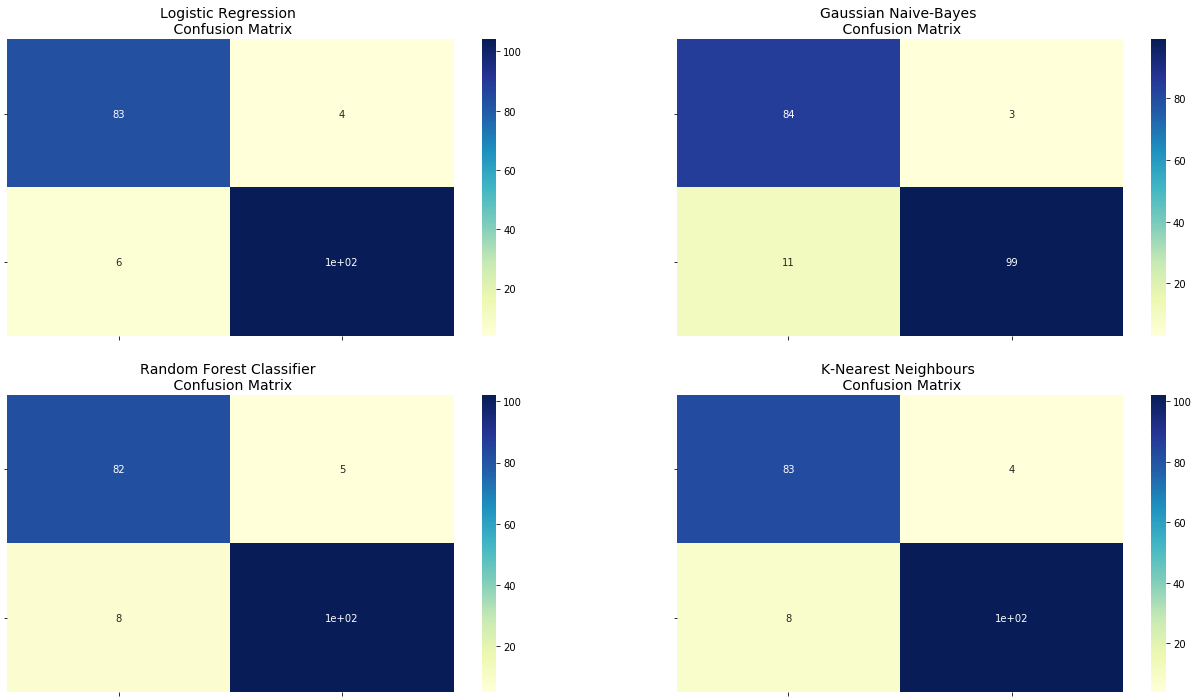

In [70]:
from matplotlib import cm

lr_cm = confusion_matrix(Y_test, lr_y_pred)
gau_cm = confusion_matrix(Y_test, gau_y_pred)
rfc_cm = confusion_matrix(Y_test, rfc_y_pred)
knn_cm = confusion_matrix(Y_test, knn_y_pred)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(lr_cm , ax=ax[0][0], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(gau_cm, ax=ax[0][1], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[0][1].set_title("Gaussian Naive-Bayes \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rfc_cm, ax=ax[1][0], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[1][0].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(knn_cm, ax=ax[1][1], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[1][1].set_title("K-Nearest Neighbours \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()